# Исследование перспектив развития GoFast

Необходимо исслодовать данные пользователей и их поездок для сервиса аренды самокатов GoFast. Следует выдвинуть и проверить некоторые гипотезы для роста бизнеса.

Данные тарифов:
- без подписки
    1. Абонентская плата - отсутствует;
    2. Стоимость одной минуты поездки - 8 рублей;
    3. Стаимость старта (начала поездки) - 50 рублей;
- с подпиской Ultra
    1. Абонентская плата - 199 руб/мес;
    2. Стоимость одной минуты поездкки - 6 рублей;
    3. Стоимость старта - бесплатно.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
#БД пользователей
data_users = pd.read_csv('/datasets/users_go.csv')
#БД поездок
data_rides = pd.read_csv('/datasets/rides_go.csv')
#БД подписок
data_subs = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
#функция вывода информации
def information(dataset):
    return (
        print( display(dataset.head(10)),
              display(dataset.info()),
              display(dataset.describe(percentiles=[0.05,0.1,1/4,1/2,3/4,0.9,0.95,0.99]).T),
              display(dataset.hist(bins=50, figsize=(20,5)), "Явные дубликаты:",
                     dataset.duplicated().sum())
              
              ))
    

##### Изучение данных

###### Информация о пользователях

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
user_id,1565.0,762.633866,443.260155,1.0,75.2,149.4,378.0,762.0,1146.0,1377.6,1455.8,1518.36,1534.0
age,1565.0,24.922045,4.553496,12.0,17.2,19.0,22.0,25.0,28.0,31.0,33.0,35.00,43.0


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

'Явные дубликаты:'

31

None None None None


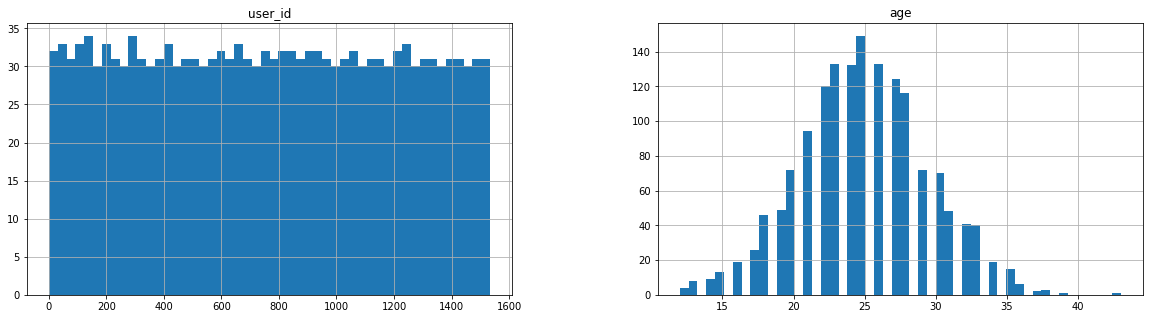

In [4]:
#Вывод информации о пользователях
information(data_users)

**Представленные данные**

Представлены следующие данные:
- `user_id` - индентификатор пользователя;
- `name` - имя пользователя;
- `age` - возраст пользователя;
- `city` - город активности пользователя;
- `subscription_type` - тип подписки (free/ultra);

**Информация о данных**

- Необнаружено неопределенных значений, присутствует 31 дублирующаяся строка;
- Распределение данных о возрасте является нормальным - отсутствуют выбросы, пик в районе среднего и медианного значений - 25 лет;
- Требуется перевод формата данных следующих столбцов: `name`,`city`,`subscription_type`.

###### Информация о поездках пользователей

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
user_id,18068.0,842.869936,434.734317,1.000000,96.000000,196.000000,487.000000,889.000000,1213.250000,1407.000000,1471.000000,1523.000000,1534.000000
distance,18068.0,3070.659976,1116.831209,0.855683,689.007279,1517.693302,2543.226360,3133.609994,3776.222735,4392.129872,4740.088596,5478.621528,7211.007745
duration,18068.0,17.805011,6.091051,0.500000,8.244528,10.293593,13.597563,17.678395,21.724800,25.760508,28.428730,32.503580,40.823963


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

'Явные дубликаты:'

0

None None None None


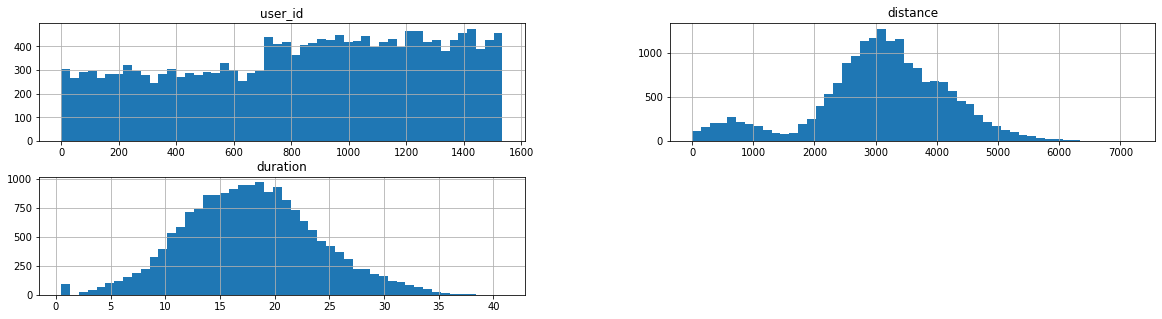

In [5]:
#Вывод информации о поездках пользователей
information(data_rides)

**Представленные данные**

Представлены следующие данные:
- `user_id` - индентификатор пользователя;
- `distance` - расстояние, которое пользователь проехал за одну сессию (в метрах);
- `duration` - продолжительность сессии (в минутах), момент с активации до окончания сессии пользователем;
- `date` - дата поездки.

**Информация о данных**

- Необнаружено неопределенных значений и явных дубликатов;
- Распределение в дистанции поездки является нормальным, за исключением возрастания до 1000м и спада в районе 1500м;
- Распределение в продолжительности сессии являтся нормальным, за исключением выброса в первую минуту;
- Требуется перевод формата данных столбца: `date`.

###### Информация о тарифах

In [6]:
print(display(data_subs),
      display(data_subs.info()))

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

None None


**Представленные данные**

Представлены следующие данные:
- `subscription_type` - тип подписки;
- `minute_price` - стоимость (руб.) за минуту;
- `start_ride_price` - стоимость начала поездки;
- `subscription_fee` - стоимость ежемесячного платежа.

**Информация о данных**

- Необнаружено неопределенных значений и явных дубликатов;
- Требуется перевод формата данных столбца: `subscription_type`.

###### Вывод

**Информация о пользователях**

Необходимо:
1. Проверить и исправить дублириющаяся значения;
2. Изменить формат следующих столбцов: `name`,`city`,`subscription_type`.

**Информация о поездах пользователей**

Необходимо:
- Исследовать причины повышения количества пользователей на дистанции поездок от 0м до 1500м;
- Исследовать выброс на продолжительности поездки в районе одной минуты;
- Требуется перевод формата данных столбца: `date`.

**Информация о тарифах**

Необходимо:
- Требуется перевод формата данных столбца: `subscription_type`.

#### Шаг 2. Предобработка данных

In [7]:
df_users = data_users.copy()
df_rides = data_rides.copy()
df_subs = data_subs.copy()

Изменим названия столбцов для удобства работы с данными

In [8]:
df_users = df_users.rename(columns={'subscription_type':'subs_type'})
df_subs = df_subs.rename(columns={'subscription_type':'subs_type', 'subscription_fee':'subs_fee'})

In [9]:
df_users.columns

Index(['user_id', 'name', 'age', 'city', 'subs_type'], dtype='object')

In [10]:
df_subs.columns

Index(['subs_type', 'minute_price', 'start_ride_price', 'subs_fee'], dtype='object')

##### Изменение форматов столбцов

In [11]:
#Приведение 'date' к типу даты pandas
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%d')
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [12]:
#Приведение столбцов 'name', 'city', 'subs_type' в датасете df_users в string
df_users['name'] = df_users['name'].astype('string')
df_users['city'] = df_users['city'].astype('string')
df_users['subs_type'] = df_users['subs_type'].astype('string')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1565 non-null   int64 
 1   name       1565 non-null   string
 2   age        1565 non-null   int64 
 3   city       1565 non-null   string
 4   subs_type  1565 non-null   string
dtypes: int64(2), string(3)
memory usage: 61.3 KB


In [13]:
#Приведение столбца 'subs_type' из df_subs в string
df_subs['subs_type'] = df_subs['subs_type'].astype('string')
df_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subs_type         2 non-null      string
 1   minute_price      2 non-null      int64 
 2   start_ride_price  2 non-null      int64 
 3   subs_fee          2 non-null      int64 
dtypes: int64(3), string(1)
memory usage: 192.0 bytes


##### Создание столбца с номером месяца

Для анализа периодов стоит создать столбец, учитывающий сезонность поездок. Так, например, количество поездок в феврале должно быть равно нулю или быть минимальным. Также этот столбец позволит определять месячную выручку.

In [14]:
df_rides['month'] = df_rides['date'].dt.month
df_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Text(0.5, 1.0, 'Распределение поездок по месяцам')

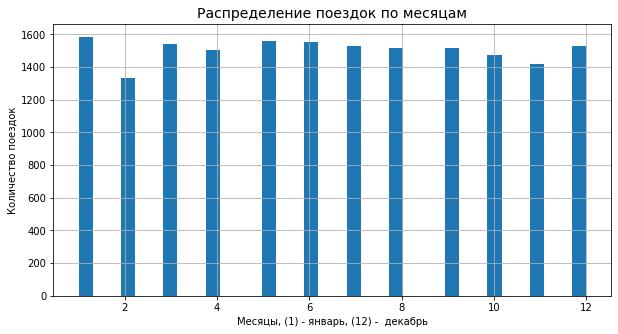

In [15]:
df_rides['month'].hist(bins=36, figsize = (10,5))
plt.xlabel('Месяцы, (1) - январь, (12) -  декабрь')
plt.ylabel('Количество поездок')
plt.title('Распределение поездок по месяцам', size = 14)

Присутствуют данные за 12 месяцев

##### Пропущенные значения и дубликаты в датафреймах

Как было отмечено ранее, в датасетах отсутствуют пропущенные значения. В `df_users` найден 31 дубликат.

In [16]:
#информация
display(df_users.info())
display(df_rides.info())
display(df_subs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1565 non-null   int64 
 1   name       1565 non-null   string
 2   age        1565 non-null   int64 
 3   city       1565 non-null   string
 4   subs_type  1565 non-null   string
dtypes: int64(2), string(3)
memory usage: 61.3 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subs_type         2 non-null      string
 1   minute_price      2 non-null      int64 
 2   start_ride_price  2 non-null      int64 
 3   subs_fee          2 non-null      int64 
dtypes: int64(3), string(1)
memory usage: 192.0 bytes


None

In [17]:
#дубликаты
print('Количество дублирующихся значений в df_users:', df_users.duplicated().sum())
print('Количество дублирующихся значений в df_rides:', df_rides.duplicated().sum())

Количество дублирующихся значений в df_users: 31
Количество дублирующихся значений в df_rides: 0


In [18]:
#первые дублирующиеся значения
df_users[df_users.duplicated()].sort_values(by='user_id').head(10)

,user_id,name,age,city,subs_type
1535,16,Амалия,27,Краснодар,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
1555,72,Никита,25,Москва,ultra
1549,108,Влада,29,Тюмень,ultra
1553,121,Алина,25,Пятигорск,ultra
1540,127,Павел,25,Пятигорск,ultra
1548,136,Марсель,25,Тюмень,ultra
1543,153,Герман,23,Москва,ultra
1542,204,Руслан,30,Пятигорск,ultra


In [19]:
#вторые дублирующиеся значения
df_users[df_users.duplicated(keep='last')].sort_values(by='user_id').head(10)

,user_id,name,age,city,subs_type
15,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
46,47,Юрий,28,Тюмень,ultra
71,72,Никита,25,Москва,ultra
107,108,Влада,29,Тюмень,ultra
120,121,Алина,25,Пятигорск,ultra
126,127,Павел,25,Пятигорск,ultra
135,136,Марсель,25,Тюмень,ultra
152,153,Герман,23,Москва,ultra
203,204,Руслан,30,Пятигорск,ultra


Подобная ошибка могла произойти по техническим причинам.

In [20]:
#удаление дубликатов
df_users = df_users.drop_duplicates()
print('Количество дублирующихся значений в df_users:', df_users.duplicated().sum())

Количество дублирующихся значений в df_users: 0


Проверим неявные повторяющиеся значения в текстовых ячейках, в частности, по городам и названию типа подписки. В столбце с именами могут присутствовать имена, где буква буква "ё" может писаться, как "е", но это не имеет значения.

In [21]:
#поиск неявных дубликатов по городам в df_users
df_users['city'].unique()

<StringArray>
[        'Тюмень',           'Омск',         'Москва', 'Ростов-на-Дону',
      'Краснодар',      'Пятигорск',   'Екатеринбург',           'Сочи']
Length: 8, dtype: string

In [22]:
#поиск неявных дубликатов по подпискам в df_users
df_users['subs_type'].unique()

<StringArray>
['ultra', 'free']
Length: 2, dtype: string

##### Вывод

1. Были изменены форматы данных в датафреймах пользователей и поездок;
2. Был создан отдельный столюец с обозначением месяца для определения сезонности поездок и определением месячной выручки;
3. Были найдены и обработаны явные дубликаты в датафрейме пользователей. Других дублирующихся значений найдено не было.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [23]:
df_users_city = df_users.pivot_table(
    index='city',
    values='user_id',
    aggfunc='count')
df_users_city = (df_users_city.rename(
    columns={'user_id':'user_count'}).sort_values(
    by='user_count', ascending=False).reset_index()
                )
df_users_city['user_fraction'] = round(
    df_users_city['user_count']/(df_users_city['user_count'].sum()),3)
df_users_city

,city,user_count,user_fraction
0,Пятигорск,219,0.143
1,Екатеринбург,204,0.133
2,Ростов-на-Дону,198,0.129
3,Краснодар,193,0.126
4,Сочи,189,0.123
5,Омск,183,0.119
6,Тюмень,180,0.117
7,Москва,168,0.110


In [24]:
print('Среднее количество пользователей в каждом городе:', df_users_city['user_count'].mean())
print('Средняя доля пользователей в каждом городе:', df_users_city['user_fraction'].mean())
print('Разница между max средним количеством и min средним количеством:',
      df_users_city['user_count'].max()-df_users_city['user_count'].min())

Среднее количество пользователей в каждом городе: 191.75
Средняя доля пользователей в каждом городе: 0.125
Разница между max средним количеством и min средним количеством: 51


Доля пользователей в каждом городе варьируется вокруг 12,5% с погрешностью 1,5%. Наиболее приближенный город к среднему - Краснодар. Рассмотрим распредение пользователей по городам на графике

Text(0.5, 1.0, 'Распределение пользователей по городам')

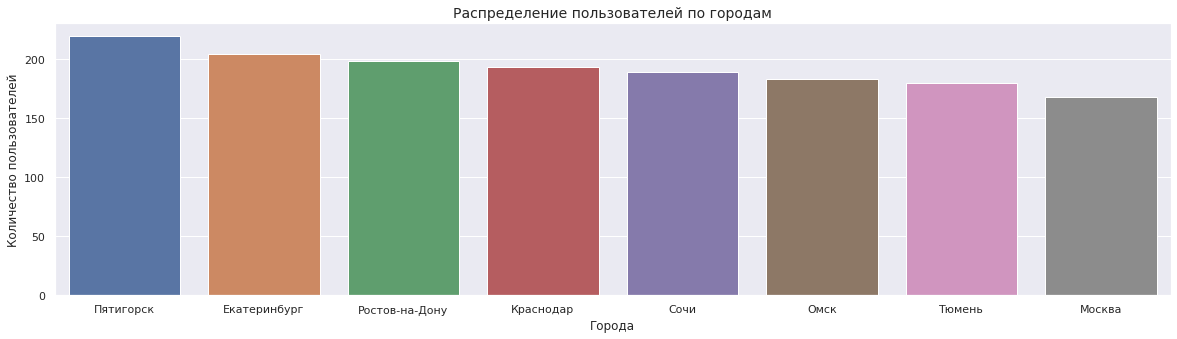

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = df_users_city,
            x = 'city',
            y = 'user_count')
plt.xlabel('Города')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по городам', size = 14)

Наибольшее количество пользователей находится в Пятигорске (219), среднее количество пользователей находится в Краснодаре (193), наименьшее - в Москве (168).

##### Соотношение пользователей с подпиской и без подписки

In [26]:
df_users_subs = df_users.pivot_table(index = 'subs_type',
                                     values = 'user_id',
                                     aggfunc = 'count')
df_users_subs = (df_users_subs.rename(
    columns={'user_id':'user_count'}).sort_values(
    by='user_count', ascending=False).reset_index()
                )
df_users_subs['user_fraction'] = round(
    df_users_subs['user_count']/(df_users_subs['user_count'].sum()),3)
df_users_subs

,subs_type,user_count,user_fraction
0,free,835,0.544
1,ultra,699,0.456


Ожидаемо, количество пользователей с подпиской меньше количества пользователей без подписки.

In [27]:
print('Разница между пользователями без подписки и с подпиской:',
      df_users_subs['user_count'].max()-df_users_subs['user_count'].min())
print('Пользователей без подписки больше на', '{:.0%}'.format(df_users_subs['user_fraction'].max()-df_users_subs['user_fraction'].min()))

Разница между пользователями без подписки и с подпиской: 136
Пользователей без подписки больше на 9%


Text(0.5, 1.0, 'Распределение пользователей по типу подписки')

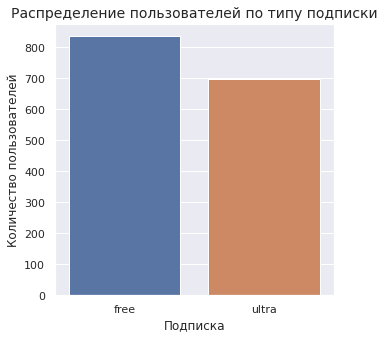

In [28]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = df_users_subs, x = 'subs_type', y = 'user_count')
plt.xlabel('Подписка')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по типу подписки', size = 14)

Пользователей без подписки (835), что на 9% от исходного количества больше количества пользователей с подпиской(699).

##### Возраст пользователей

In [29]:
df_users['age'].describe(percentiles=[0.05,0.1, 0.2,1/4,1/2,3/4, 0.8,0.9,0.95,0.99])

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
5%         17.000000
10%        19.000000
20%        21.000000
25%        22.000000
50%        25.000000
75%        28.000000
80%        29.000000
90%        31.000000
95%        33.000000
99%        35.000000
max        43.000000
Name: age, dtype: float64

Text(0, 0.5, 'Возраст пользователей')

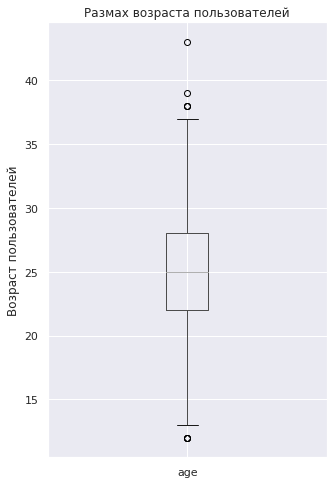

In [30]:
df_users.boxplot(column='age', figsize =(5, 8))
plt.title('Размах возраста пользователей')
plt.ylabel('Возраст пользователей')

In [31]:
df_users['age'].quantile([0.25, 0.5, 0.75])


0.25    22.0
0.50    25.0
0.75    28.0
Name: age, dtype: float64

Text(0.5, 1.0, 'Распределение пользователей по возрасту')

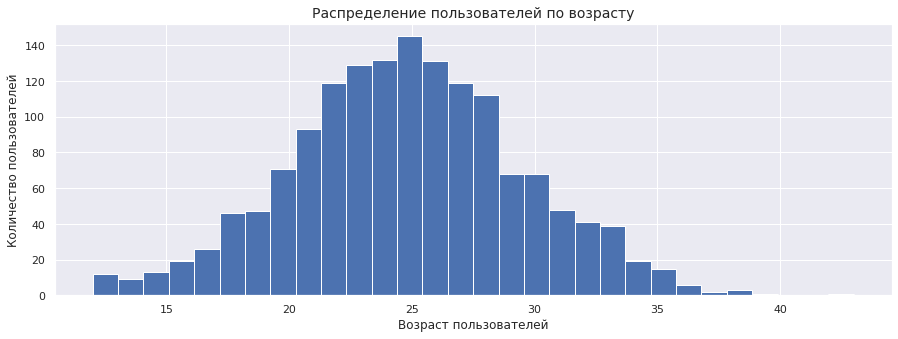

In [32]:
df_users['age'].hist(bins=30, figsize =(15,5))
plt.xlabel('Возраст пользователей')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрасту', size = 14)

Основную аудиторию представляют люди возрастом от 22 до 28 лет.

##### Расстояние, которое пользователь преодолел за одну поездку

Рассмотрим общую модель

In [33]:
df_rides['distance'].describe(percentiles=[0.05,0.1, 0.2,1/4,1/2,3/4, 0.8,0.9,0.95,0.99])

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
5%         689.007279
10%       1517.693302
20%       2375.491135
25%       2543.226360
50%       3133.609994
75%       3776.222735
80%       3975.359574
90%       4392.129872
95%       4740.088596
99%       5478.621528
max       7211.007745
Name: distance, dtype: float64

Text(0, 0.5, 'Дистанции поездок')

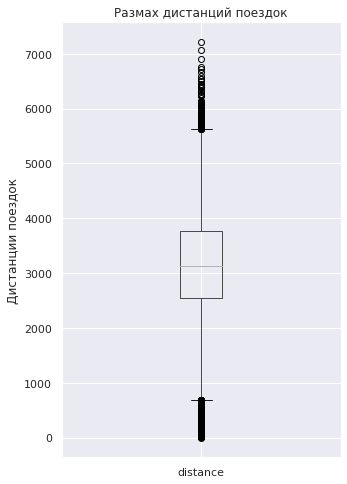

In [34]:
df_rides.boxplot(column='distance', figsize =(5, 8))
plt.title('Размах дистанций поездок')
plt.ylabel('Дистанции поездок')

Text(0.5, 1.0, 'Распределение дистанций каждой поездки')

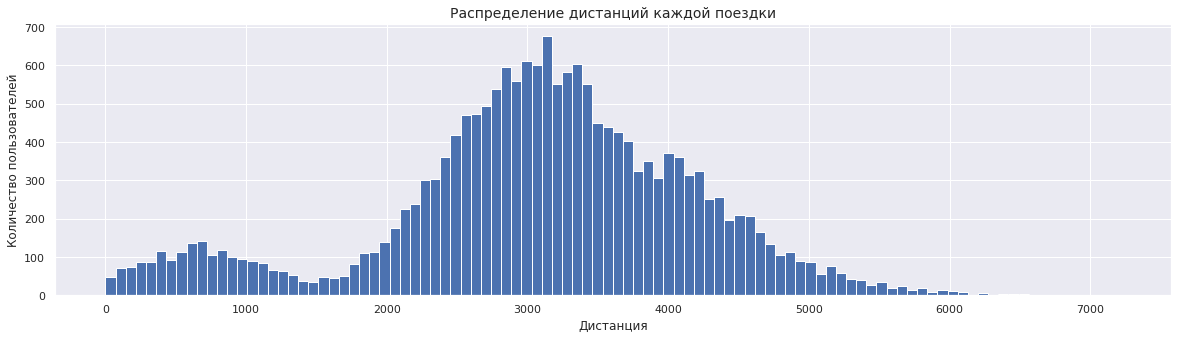

In [35]:
df_rides['distance'].hist(bins=100, figsize = (20, 5))
plt.xlabel('Дистанция')
plt.ylabel('Количество пользователей')
plt.title('Распределение дистанций каждой поездки', size = 14)

Как видно из полученных данных, в основном сервис используется для преодоления дистанций от 2,5 до 3,8км, однако присутствует выброс на дистанции до 1500км. Данный выброс может быть связан с наличием платного старта для пользователей с бесплатной подпиской.

Проверим данную гипотезу

In [36]:
#Объявление временного датафрейма
users_dist_subs = pd.merge(df_users[['user_id', 'subs_type']], df_rides[['user_id','distance']])
users_dist_subs.head()

,user_id,subs_type,distance
0,1,ultra,4409.919140
1,1,ultra,2617.592153
2,1,ultra,754.159807
3,1,ultra,2694.783254
4,1,ultra,4028.687306


Text(0.5, 1.0, 'Распределение дистанций каждой поездки пользователей без подписки')

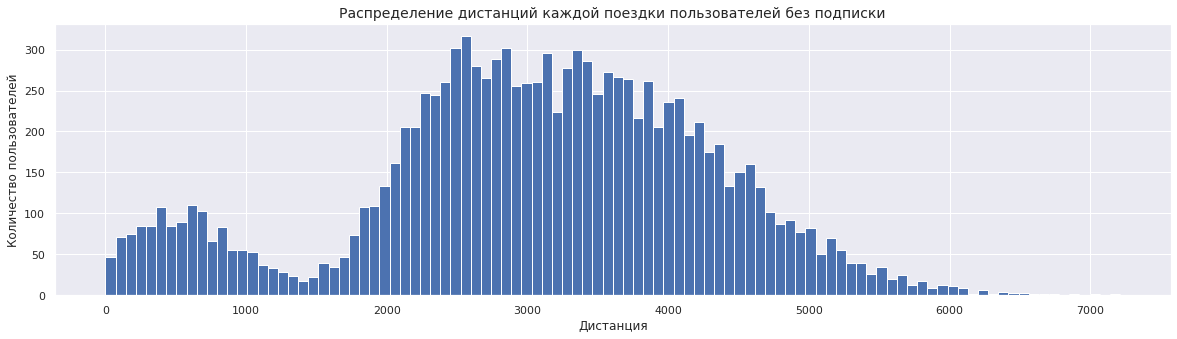

In [37]:
users_dist_subs[users_dist_subs['subs_type'] == 'free'].distance.hist(bins=100, figsize = (20, 5))
plt.xlabel('Дистанция')
plt.ylabel('Количество пользователей')
plt.title('Распределение дистанций каждой поездки пользователей без подписки', size = 14)

Text(0.5, 1.0, 'Распределение дистанций каждой поездки пользователей с подпиской')

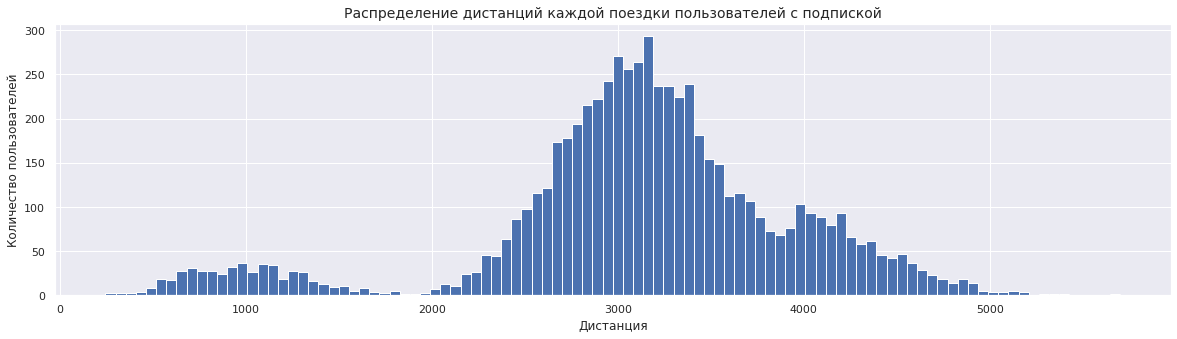

In [38]:
users_dist_subs[users_dist_subs['subs_type'] == 'ultra'].distance.hist(bins=100, figsize = (20, 5))
plt.xlabel('Дистанция')
plt.ylabel('Количество пользователей')
plt.title('С подпиской')
plt.title('Распределение дистанций каждой поездки пользователей с подпиской', size = 14)

Как видно из распределений, выброс связан с тем, что пользователи без подписки на данной дистанции пользуются самокатами чаще, чем пользователи с подпиской.

##### Продолжительность поездок

In [39]:
df_rides['duration'].describe(percentiles=[0.05,0.1, 0.2,1/4,1/2,3/4, 0.8,0.9,0.95,0.99])

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
5%           8.244528
10%         10.293593
20%         12.657143
25%         13.597563
50%         17.678395
75%         21.724800
80%         22.780542
90%         25.760508
95%         28.428730
99%         32.503580
max         40.823963
Name: duration, dtype: float64

<AxesSubplot:>

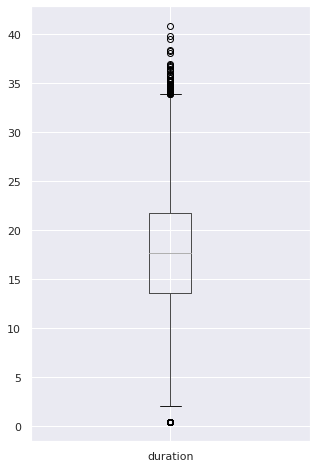

In [40]:
df_rides.boxplot(column='duration', figsize =(5, 8))

Text(0.5, 1.0, 'Распределение продолжительности каждой поездки пользователей')

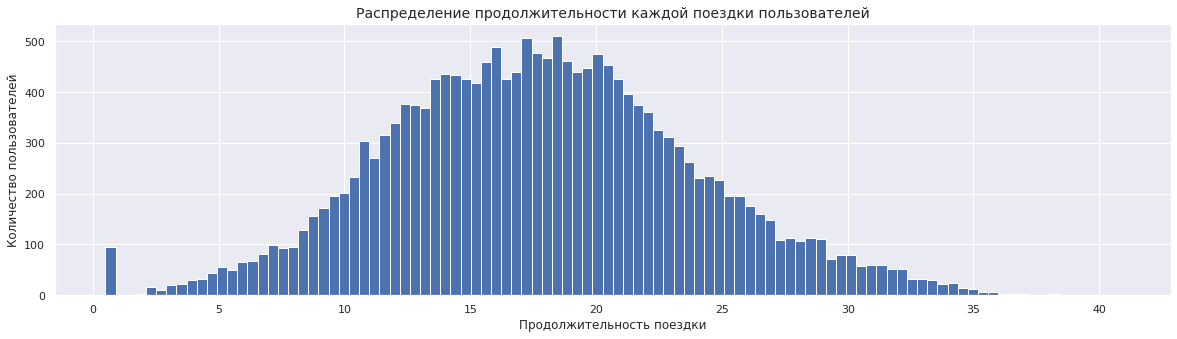

In [41]:
df_rides['duration'].hist(bins=100, figsize = (20, 5))
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество пользователей')
plt.title('Распределение продолжительности каждой поездки пользователей', size = 14)

В среднем пользователи тратят от 14 до 22 минут на поездку. При этом заметен выброс в начале распределения.

Text(0.5, 1.0, 'Распределение продолжительности каждой поездки пользователей на промежутке до 4 минут')

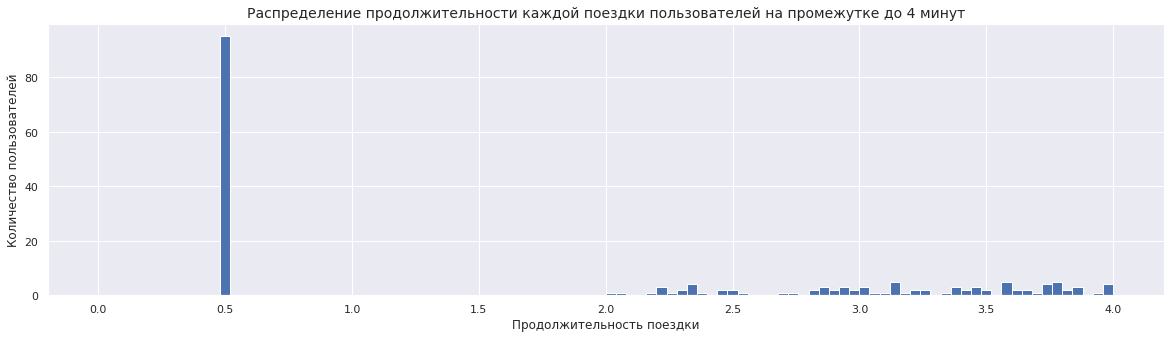

In [42]:
df_rides['duration'].hist(bins=100, figsize = (20, 5), range = (0, 4))
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество пользователей')
plt.title('Распределение продолжительности каждой поездки пользователей на промежутке до 4 минут', size = 14)

In [43]:
df_rides[df_rides['duration']==0.5].duration.count()

95

Выброс заметен на 30 секундах и составляет 95 поездок. Данный выброс может быть связан с тем, что пользователь передумал использовать самокат.

##### Вывод

1. Доля пользователей от их общего количества варьируется вокруг 12,5% с разбросом 1,5%. Наиболее приблеженный город к среднему значению - Краснодар. Наибольшее каличество пользователей находится в Пятигорске, а наименьшее - в Москве;
2. Пользователей без подписки (835) больше, чем пользователей с подпиской (699), т.е. на 9%;
3. Основную аудиторию сервиса представляют пользователи от 22 до 28 лет;
4. В основом сервисом пользуются для преодоления дистанций от 2,5 до 3,8км. Замечен выброс на дистанции до 1500км, связанный с преобладанием пользователей без подписки для пользования сервиса на данной дистанции. Предполагается, что на данной дистанции действует функция "Платный старт";
5. В среднем пользователи используют сервис от 14 до 22 минут на поездку. При этом замечен выброс на продолжительности в 30 секунд, который может быть связан с тем, что пользользователь передумал использовать самокат в качестве средства передвижения.

#### Шаг 4. Объединение данных

##### Объединение данных о пользователях, поездках и подписках

In [44]:
print('Размер датасета с информацией о пользователях:', df_users.shape)
print('Размер датасета с информацией о поездках:', df_rides.shape)

Размер датасета с информацией о пользователях: (1534, 5)
Размер датасета с информацией о поездках: (18068, 5)


В датасете с информацией о пользователях: 1534 записи и 5 столбцов;

В датасете с информацией о поездках: 18068 записей и 5 столбцов.

In [45]:
#Формирование БД о поездках пользователей
df_all = pd.merge(df_users, df_rides, on = 'user_id')
df_all.head()

,user_id,name,age,city,subs_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


In [46]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    18068 non-null  int64         
 1   name       18068 non-null  string        
 2   age        18068 non-null  int64         
 3   city       18068 non-null  string        
 4   subs_type  18068 non-null  string        
 5   distance   18068 non-null  float64       
 6   duration   18068 non-null  float64       
 7   date       18068 non-null  datetime64[ns]
 8   month      18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), string(3)
memory usage: 1.4 MB


In [47]:
df_all.shape

(18068, 9)

В новом датасете 18068 записей и 9 столбцов. Потеря одного столбца связана с объединением по столбцу `user_id`.

Данные не были потеряны

In [48]:
df_subs.shape

(2, 4)

В информации о тарифах 2 записи и 4 столбца

In [49]:
#объединение с тарифами
df_all = pd.merge(df_all, df_subs, on = 'subs_type')
df_all.head()

,user_id,name,age,city,subs_type,distance,duration,date,month,minute_price,start_ride_price,subs_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [50]:
df_all.shape

(18068, 12)

В конечном датасете 18069 записей, как в самом крупном изначальном датасете, и 12 столбцов:
 - по 5 из датасетов из информации по пользователям и их поездкам с объединением по столбцу `user_id`;
 - 3 столбца из информации о тарифах с объединением по столбцу `subs_type` - тип подписки.

In [51]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           18068 non-null  int64         
 1   name              18068 non-null  string        
 2   age               18068 non-null  int64         
 3   city              18068 non-null  string        
 4   subs_type         18068 non-null  string        
 5   distance          18068 non-null  float64       
 6   duration          18068 non-null  float64       
 7   date              18068 non-null  datetime64[ns]
 8   month             18068 non-null  int64         
 9   minute_price      18068 non-null  int64         
 10  start_ride_price  18068 non-null  int64         
 11  subs_fee          18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), string(3)
memory usage: 1.8 MB


В ходе объединения не было потери записей, а неопределенных значений не обнаружено

##### Создание общей БД о пользователях без подписки и общей БД о пользователях с подписков

In [52]:
#без подписки
df_all_unsubs = df_all[df_all['subs_type'] == 'free'].copy()
df_all_unsubs.head()

,user_id,name,age,city,subs_type,distance,duration,date,month,minute_price,start_ride_price,subs_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [53]:
#с подпиской
df_all_subs = df_all[df_all['subs_type'] == 'ultra'].copy()
df_all_subs.head()

,user_id,name,age,city,subs_type,distance,duration,date,month,minute_price,start_ride_price,subs_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [54]:
#проверка на потерю данных
print('Общее количество изначальных записей - ', len(df_all))
print('Общее количество записей о пользователях с подпиской - ', len(df_all_subs))
print('Общее количество записей о пользователях без подпиской - ', len(df_all_unsubs))
print('Потеря данных - ', len(df_all)-len(df_all_subs)-len(df_all_unsubs))

Общее количество изначальных записей -  18068
Общее количество записей о пользователях с подпиской -  6500
Общее количество записей о пользователях без подпиской -  11568
Потеря данных -  0


##### Визуализации информации о расстоянии и времени поездок для пользователей обеих категорий

###### Визуализация расстояния поездки

Text(0.5, 1.0, 'Распределение дистанции каждой поездки пользователей без подписки')

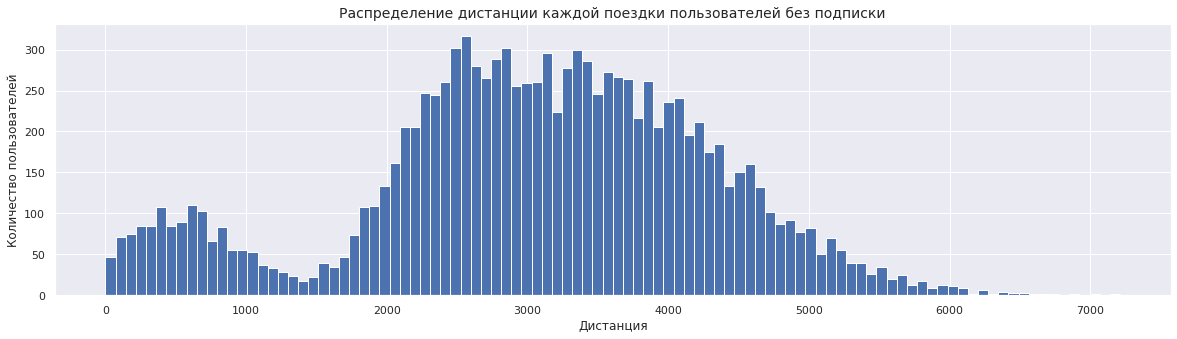

In [55]:
df_all_unsubs['distance'].hist(bins=100, figsize=(20,5))
plt.xlabel('Дистанция')
plt.ylabel('Количество пользователей')
plt.title('Распределение дистанции каждой поездки пользователей без подписки', size = 14)

Text(0.5, 1.0, 'Распределение дистанции каждой поездки пользователей с подпиской')

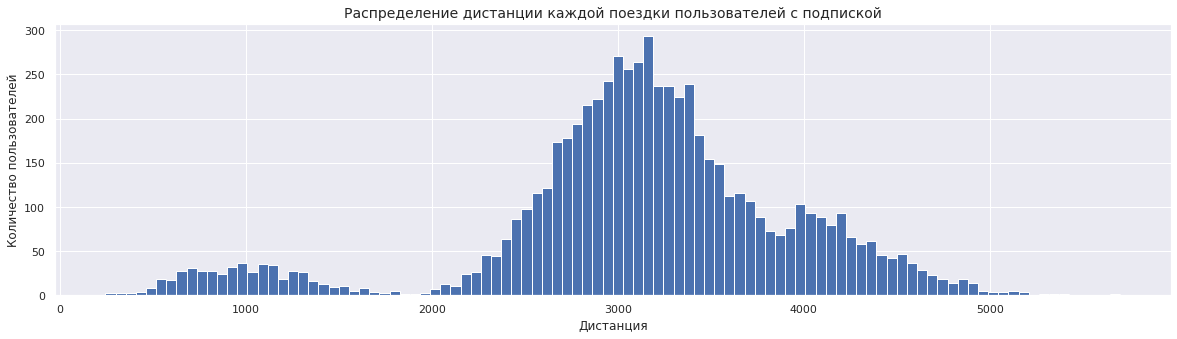

In [56]:
df_all_subs['distance'].hist(bins=100, figsize=(20,5))
plt.xlabel('Дистанция')
plt.ylabel('Количество пользователей')
plt.title('С подпиской')
plt.title('Распределение дистанции каждой поездки пользователей с подпиской', size = 14)

Как уже отмечалось в пункте 3.4, пользователей с бесплатной подпиской на дистанции поездки до 1500м больше, что может быть связано с платным стартом.

###### Визуализация продолжительности поездки

Text(0.5, 1.0, 'Распределение продолжительности каждой поездки пользователей без подписки')

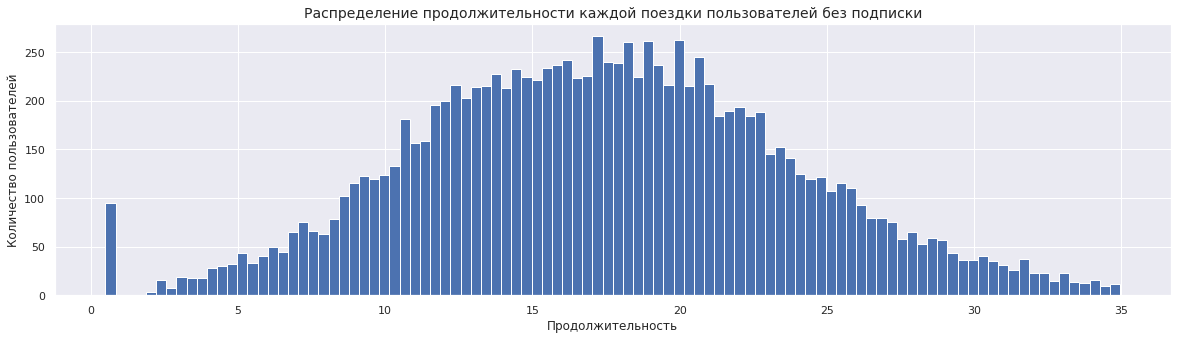

In [57]:
df_all_unsubs['duration'].hist(bins=100, figsize=(20,5))
plt.xlabel('Продолжительность')
plt.ylabel('Количество пользователей')
plt.title('Распределение продолжительности каждой поездки пользователей без подписки', size = 14)

Text(0.5, 1.0, 'Распределение продолжительности каждой поездки пользователей с подпиской')

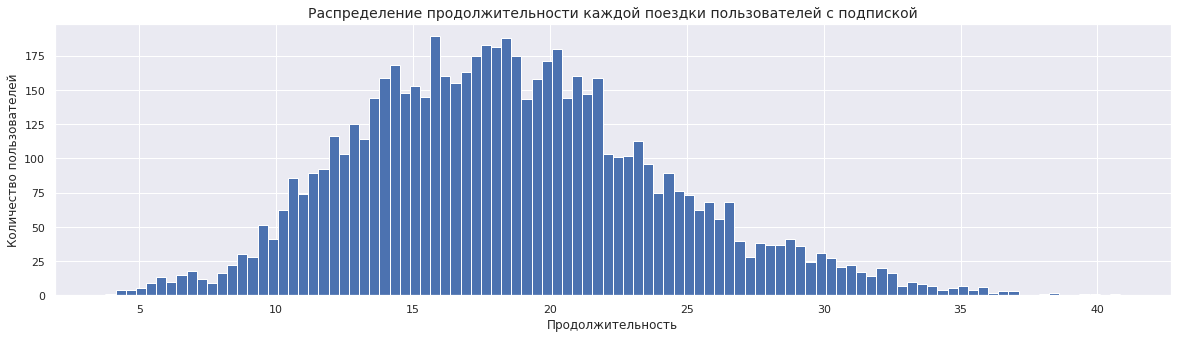

In [58]:
df_all_subs['duration'].hist(bins=100, figsize=(20,5))
plt.xlabel('Продолжительность')
plt.ylabel('Количество пользователей')
plt.title('Распределение продолжительности каждой поездки пользователей с подпиской', size = 14)

Как было отмечено в пункте 3.5, на 30 секундах заметен выброс в 95 единиц, причиной которого являются пользователи без платной подписки. Данный фактор может быть связан с тем, что пользователь передумал использовать самокат в качестве средства передвижения.

###### Вывод

Все выбросы на основных графиках распределения связаны с пользованием сервисом пользователями бесплатной подписки.

#### Шаг 5. Подсчёт выручки

##### Создание датафрейма с агрегированными данными

Необходимо создать датафрейм со следующими столбцами:
- суммарное расстояние для пользователя за каждый месяц;
- суммарное количество поездок за каждый месяц;
- суммарное время поездок за каждый месяц.


In [59]:
df_all_agg = df_all.groupby(['user_id', 'month']).agg(
    {'distance':'sum', 'duration':['sum', 'count'],
    'subs_type':'first',
    'minute_price':'first',
    'start_ride_price':'first',
    'subs_fee':'first'})
df_all_agg.head(10)

distance   duration       subs_type minute_price  \
                        sum        sum count     first        first   
user_id month                                                         
1       1       7027.511294  41.416640     2     ultra            6   
        4        754.159807   6.232113     1     ultra            6   
        8       6723.470560  44.776802     2     ultra            6   
        10      5809.911100  31.578017     2     ultra            6   
        11      7003.499363  53.397424     3     ultra            6   
        12      6751.629942  27.203912     2     ultra            6   
2       3      10187.723006  60.959959     3     ultra            6   
        4       6164.381824  39.048633     2     ultra            6   
        6       3255.338202  13.851127     1     ultra            6   
        7       6780.722964  46.170157     2     ultra            6   

              start_ride_price subs_fee  
                         first    first  
user_id month                            
1       1                    0      199  
        4                    0      199  
        8                    0      199  
        10                   0      199  
        11                   0      199  
        12                   0      199  
2       3                    0      199  
        4                    0      199  
        6                    0      199  
        7                    0      199

In [60]:
df_all_agg.columns = ['distance_sum', 'duration_sum', 'rides_count',
                      'subs_type', 'minute_price',
                      'start_ride_price', 'subs_fee']
df_all_agg.reset_index(inplace=True)
df_all_agg.head()

,user_id,month,distance_sum,duration_sum,rides_count,subs_type,minute_price,start_ride_price,subs_fee
0,1,1,7027.511294,41.416640,2,ultra,6,0,199
1,1,4,754.159807,6.232113,1,ultra,6,0,199
2,1,8,6723.470560,44.776802,2,ultra,6,0,199
3,1,10,5809.911100,31.578017,2,ultra,6,0,199
4,1,11,7003.499363,53.397424,3,ultra,6,0,199


In [61]:
df_all_agg.shape

(11331, 9)

In [62]:
df_all_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           11331 non-null  int64  
 1   month             11331 non-null  int64  
 2   distance_sum      11331 non-null  float64
 3   duration_sum      11331 non-null  float64
 4   rides_count       11331 non-null  int64  
 5   subs_type         11331 non-null  string 
 6   minute_price      11331 non-null  int64  
 7   start_ride_price  11331 non-null  int64  
 8   subs_fee          11331 non-null  int64  
dtypes: float64(2), int64(6), string(1)
memory usage: 796.8 KB


Была сформирована сводная таблица 11331 записью и 9 столбцами:
- `user_id` - id пользователя;
- `month` - месяц совершения поездок;
- `distance_sum` - суммарное расстояние, которое проехал пользователь за все поездки в течение месяца, в метрах;
- `duration_sum` - суммарная длительность поездок в минутах;
- `rides_count` - суммарное количество поездок;
- `subs_type` - тип подписки;
- `minute_price` - цена одной поездки в минуту;
- `start_ride_price` - цена начала поездки;
- `subs_fee` - стоимость подписки.

В ходе объединения не было сформировано неопределенных значений

##### Добавление столбца с помесячной выручкой для каждого пользователся

In [63]:
df_all_agg['month_revenue'] = ( 
    df_all_agg['start_ride_price'] * df_all_agg['rides_count'] + 
    df_all_agg['minute_price'] * np.ceil(df_all_agg['duration_sum']) + 
    df_all_agg['subs_fee'])
df_all_agg.head()

,user_id,month,distance_sum,duration_sum,rides_count,subs_type,minute_price,start_ride_price,subs_fee,month_revenue
0,1,1,7027.511294,41.416640,2,ultra,6,0,199,451.0
1,1,4,754.159807,6.232113,1,ultra,6,0,199,241.0
2,1,8,6723.470560,44.776802,2,ultra,6,0,199,469.0
3,1,10,5809.911100,31.578017,2,ultra,6,0,199,391.0
4,1,11,7003.499363,53.397424,3,ultra,6,0,199,523.0


In [64]:
print( 'Количество неопределенных значений:', df_all_agg['month_revenue'].isna().sum())

Количество неопределенных значений: 0


##### Вывод

Сформирована агрированная таблица с суммарным количество поездок, суммарной продолжительностью, общим количеством поездок за каждый месяц. Определена помесячная выручка с каждого пользователя в месяц.

#### Шаг 6. Проверка гипотез

##### Гипотеза 1. Тратят ли пользователи с подпиской больше времени на поездки

Необходимо узнать, тратят ли пользователи с подпиской больше времени на поездки. Если да, то пользователи с подпиской "выгоднее" для компании. 

**H0**: Среднее время поездки у пользователей с подпиской и без подписки одинаковое

**H1**: Среднее время поездки у пользователей c подпиской больше, чем среднее время поездки пользователей без подписки

Значение критического уровня статистической значимости принимается 0.05

In [65]:
alpha = 0.05
results = st.ttest_ind(df_all_subs['duration'], df_all_unsubs['duration'], alternative = 'greater')
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Среднее время поездки у пользователей с подпиской меньше, чем у пользователей без подписки

##### Гипотеза 2. Расстояние, которое проезжают пользователи с подпиской, не превышает 3130 метров

**H0**: Дистанция, которую преодолевают пользователи с платной подпиской за одну поездку, составляет 3130м

**H1**: Дистанция, которой достигают пользователи с подпиской за одну поездку, меньше 3130м

In [66]:
int_result = 3130
alpha = 0.05
results = st.ttest_1samp( df_all_subs['distance'], int_result, alternative = 'greater')
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 0.9195368847849785
Не отвергаем нулевую гипотезу


Средняя дистанция, которой достигнет пользователь с подпиской за одну поездку, меньше 3130м. Вероятность такого исхода - 92%.

##### Гипотеза 3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

**H0**: Помесячная выручка пользователей с подпиской равна помесячной выручке пользователей без подписки

**H1**: Помесячная выручка пользователей с подпиской больше помесячной выручки пользователей без подписки

In [67]:
alpha = 0.05
results = st.ttest_ind( df_all_agg.query("subs_type == 'ultra'")['month_revenue'],
                        df_all_agg.query("subs_type == 'free'")['month_revenue'],
                       alternative = 'greater')
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 2.8130926188487286e-35
Отвергаем нулевую гипотезу


Помесячная выручка от пользователей с подпиской по месяцами меньше помесячной выручки от пользователей без подписки

##### Какой тест понадобился бы для проверки гипотезы

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

**Решение**

Предположим, что имеется некий датасет со значениями количества обращений

**H0**: Количество обращений не изменилось;

**H1**: Количество обращений стало меньше.

In [68]:
users_call = {'user_id':[ 1, 2, 3, 4, 5, 6], 
              'calls_before':[ 5, 7, 3, 9, 5, 3],
              'calls_after':[ 3, 2, 1, 7, 3, 0]}

In [69]:
alpha = 0.05
results = st.ttest_rel(users_call['calls_before'], users_call['calls_after'], alternative = 'less')
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую теорию')
else: 
    print('Не отвергаем нулевую теорию')

p-значение 0.9985212233897577
Не отвергаем нулевую теорию


Вероятность того, что количество обращений от пользователя станет меньше составляет приближенно 100%

Так был выбран метод `st.ttest_rel`, отвечающий за проверку гипотезы о равенстве среднего значения до и после изменения

##### Вывод

1. Среднее время поездки у пользователей с подпиской меньше, чем у пользователей без подписки;
2. Средняя дистанция, которой достигнет пользователь с подпиской за одну поездку, менее 3130м. Вероятность такого исхода - 92%;
3. Полумесячная выручка от пользователей с подпиской по месяцам меньше полумесячной выруски от пользователей без подписки.

#### Вывод

В данном проекте были произведены следующие действия и получены следующие итоги:

##### Изучение данных

Были изучены данные из датасетов с информацией о пользователях, их поездках и тарифах. Были намечены задачи по предобработке данных и исследовательской аналиху данных.
1. В датасете с информацией о пользователямх были обнаружены дублирующаяся значения. Также было необходимо исправить форматы некоторых столбцов;
2. В датасете с информацией о поездках пользователей были обнаружены выбросы на дистанции поездок от 0м до 1500м и на продолжительности поездки в районе 30 секунд. Также было необходимо изменить формат даты для дальнейшей обработки столбца;
3. В информации о тарифах было необходимо изменить формат столбца для его дальнейшей обработки.

##### Предобработка данных

Была выполнена предобработка данных для дальнейшей работы.
1. Были изменены форматы столбцов;
2. Был создан столбец с номером месяца для дальнейшей обработки;
3. Были обработаны дубликаты в датафрейме с информацией о пользователях.

##### Исследовательский анализ данных

Были изучены факторы и зависимости.
1. Доля пользователей от их общего количества по городам варьируется вокруг 12,5% с разбросом 1,5%. Наибольшее количество пользователей сосредоточено в Пятигорске, наименьшее - в Москве. Город, чья доля пользователей наиболее приближена к среднему значению - Краснодар;
2. Разница между пользователями без подписки и пользователями с подпиской составляет 9%:
    - Без подписки: 835 пользователей;
    - С подпиской: 699 пользователей;
    
   У сервиса получилось выработать постоянную аудиторию
3. Основную аудиторию сервиса представляют пользователи от 22 до 28 лет с медианным значением 25 лет;
4. В основном сервисом пользуются для преодоления дистанций от 2,5 до 3,8 км с медианным значением 3,133 км. Был замечен выброс до 1500 метров, связанный с преобладанием пользователей без подписки. Преполагается, что на данной дистанции действует функция "Платный старт";
5. В среднем пользователи испольют сервис от 14 до 22 минут на поездку с медианным значением 17,5 минут. Был замечен выброс продолжительностью 30 секунд, который может быть связан с тем, что пользователь передумал использовать самокат в качестве средства передвижения. 

##### Объединение данных

Были объеденены данные для дальнейшей проверки гипотез.

##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

Было обнаружено, что все выбросы на распределениях данных с продолжительностью и дистанцией поездок связаны с пользование сервисом клиентов без подписки. Так было обнаружено, что выброс на 30 секундах связан с пользователями без подписки. Количество таких случаев составляет 95.

Согласно наблюдениям, характер поведения распределения дистанции продолжительности одной поездки пользователями с платной поездкой и без подписки одинаковый, но поездки пользователей без подписки меньше по длительности и расстоянию, чем у пользователей с подпиской.

##### Подсчет выручки

В пункте 5 был выведен датафрейм с расчетом суммарного количества поездок, суммарной продолжительностью поездок, общим количеством поездок для каждого месяца на каждого пользователя. Также была определеная помесячная выручка с каждого пользователся в месяц.

##### Проверка гипотез

Были изучены следющие гипотезы:
 - **Среднее время поездки у пользователей больше, чем среднее время поездки пользователей без подписки.** В ходе исследования была опровергнута данная теория. Среднее время поездки у пользователей с подпиской меньше, чем у пользователей без подписки;
 - **Дистанция, которой достигают пользователи с подпиской за одну поездку, меньше 3130 м**. Данная гипотеза была подтверждена. Вероятность, что пользователь с подпиской достигнет дистанции меньше 3130 м - 92%;
 - **Помесячная выручка пользователей с подпиской больше помесячной выручки пользователей без подписки.** Помесячная выручка от пользователей с подпиской по месяцам меньше помусячной выручки от пользователей без подписки.

##### Итог

- Обнаружены дублирующиеся строки в датасете с информацией о клиентах. Такая ошибка может быть связана с технической частью;
- У сервиса получилось выработать постоянную базу клиентов, которая меньше непостоянной всего на 9% от общего количества;
- Пользователи без подписки приносят больше помесячной выручки, чем пользователи с подпиской.